In [30]:
# Importing 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import nltk
from sklearn.metrics import accuracy_score, precision_score
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier

In [31]:
#Loading the Dataset
data=pd.read_csv("mail_data.csv")
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [32]:
data.shape

(5572, 2)

### Data Analysis

In [33]:
data['num_char'] = data['Message'].apply(len)
data.head()

,Category,Message,num_char
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [34]:
data['num_words'] = data['Message'].apply(lambda x:len(nltk.word_tokenize(x)))
data.head()

,Category,Message,num_char,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


In [35]:
data['num_sen'] = data['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))
data.head()

,Category,Message,num_char,num_words,num_sen
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


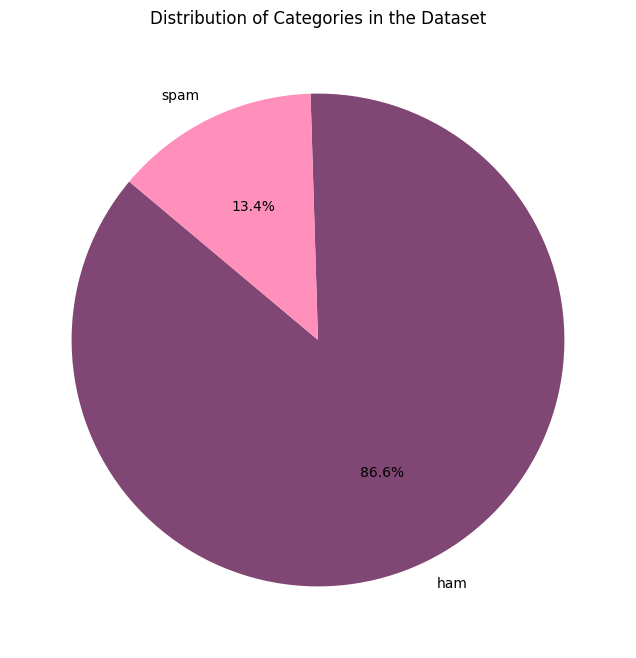

In [36]:
category_counts = data['Category'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=['#804674','#FF90BC'])
plt.title('Distribution of Categories in the Dataset')
plt.show()

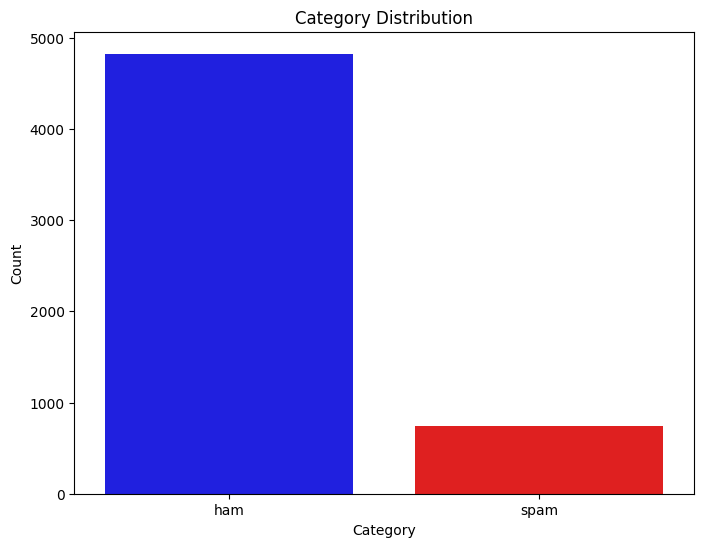

In [37]:
# Bar plot of the category distribution
category_counts = data['Category'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette=['blue', 'red'])
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [38]:
# Preprocess the data
X = data['Message']
y = data['Category'].map({'ham': 0, 'spam': 1})

In [39]:
# Convert text data to numerical data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

In [40]:
data.head()

,Category,Message,num_char,num_words,num_sen
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [41]:
data.info

<bound method DataFrame.info of      Category                                            Message  num_char  \
0         ham  Go until jurong point, crazy.. Available only ...       111   
1         ham                      Ok lar... Joking wif u oni...        29   
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...       155   
3         ham  U dun say so early hor... U c already then say...        49   
4         ham  Nah I don't think he goes to usf, he lives aro...        61   
...       ...                                                ...       ...   
5567     spam  This is the 2nd time we have tried 2 contact u...       160   
5568      ham               Will ü b going to esplanade fr home?        36   
5569      ham  Pity, * was in mood for that. So...any other s...        57   
5570      ham  The guy did some bitching but I acted like i'd...       125   
5571      ham                         Rofl. Its true to its name        26   

      num_words  num_sen  
0   

In [42]:
data.dtypes

Category     object
Message      object
num_char      int64
num_words     int64
num_sen       int64
dtype: object

In [43]:
results = {
    'Classifier': [],
    'Accuracy': [],
    'Precision': []
}

In [44]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Function to plot confusion matrix heatmap and classification report
def evaluate_model(clf, X_train, y_train, X_test, y_test, title):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    # Print classification report
    print(f"Classification Report for {title}:")
    print(classification_report(y_test, y_pred))
    print("\n")

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {title}: {accuracy*100:.2f}%\n")

    # Calculate precision for each class and print
    precision = precision_score(y_test, y_pred, average=None)
    for i in range(len(precision)):
        print(f"Precision for class {i}: {precision[i]:.2f}")
        
    results['Classifier'].append({title})
    results['Accuracy'].append(f"{accuracy*100:.2f}")
    results['Precision'].append([f"{p:.2f}" for p in precision])
    

## Trying different models 

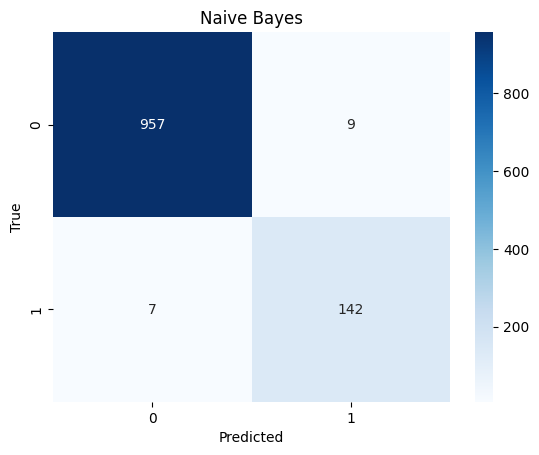

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.94      0.95      0.95       149

    accuracy                           0.99      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



Accuracy for Naive Bayes: 98.57%

Precision for class 0: 0.99
Precision for class 1: 0.94


In [46]:
# 1. Naive Bayes
nb = MultinomialNB()
evaluate_model(nb, X_train, y_train, X_test, y_test, 'Naive Bayes')

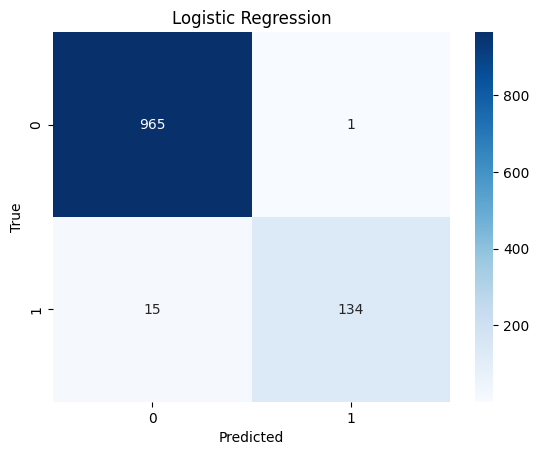

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.90      0.94       149

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115



Accuracy for Logistic Regression: 98.57%

Precision for class 0: 0.98
Precision for class 1: 0.99


In [47]:
# 2. Logistic Regression
lr = LogisticRegression(max_iter=1000)
evaluate_model(lr, X_train, y_train, X_test, y_test, 'Logistic Regression')

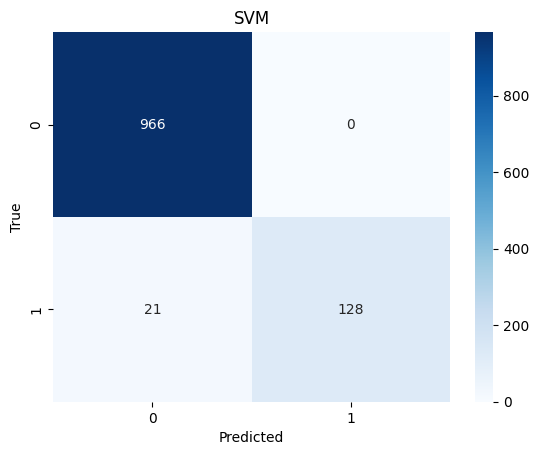

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.86      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



Accuracy for SVM: 98.12%

Precision for class 0: 0.98
Precision for class 1: 1.00


In [48]:
# 3. Support Vector Machine (SVM)
svm = SVC()
evaluate_model(svm, X_train, y_train, X_test, y_test, 'SVM')

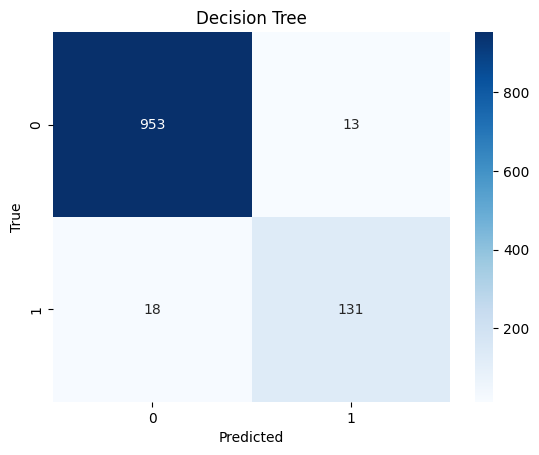

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       966
           1       0.91      0.88      0.89       149

    accuracy                           0.97      1115
   macro avg       0.95      0.93      0.94      1115
weighted avg       0.97      0.97      0.97      1115



Accuracy for Decision Tree: 97.22%

Precision for class 0: 0.98
Precision for class 1: 0.91


In [49]:
# 4. Decision Tree
dt = DecisionTreeClassifier()
evaluate_model(dt, X_train, y_train, X_test, y_test, 'Decision Tree')

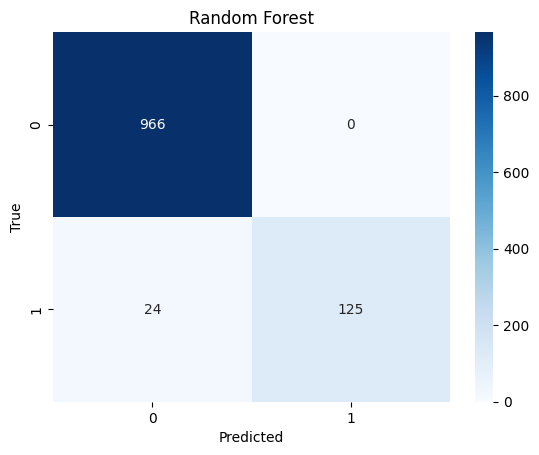

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.84      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



Accuracy for Random Forest: 97.85%

Precision for class 0: 0.98
Precision for class 1: 1.00


In [50]:
# 5. Random Forest
rf = RandomForestClassifier()
evaluate_model(rf, X_train, y_train, X_test, y_test, 'Random Forest')

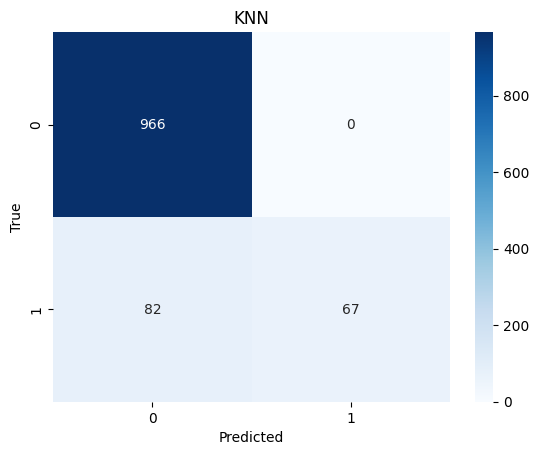

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       966
           1       1.00      0.45      0.62       149

    accuracy                           0.93      1115
   macro avg       0.96      0.72      0.79      1115
weighted avg       0.93      0.93      0.91      1115



Accuracy for KNN: 92.65%

Precision for class 0: 0.92
Precision for class 1: 1.00


In [51]:
# 6. K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
evaluate_model(knn, X_train, y_train, X_test, y_test, 'KNN')

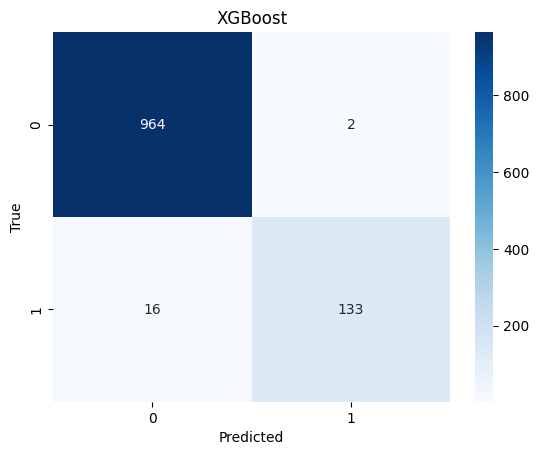

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.89      0.94       149

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



Accuracy for XGBoost: 98.39%

Precision for class 0: 0.98
Precision for class 1: 0.99


In [52]:
# 7. XGBoost
clf_xgb = xgb.XGBClassifier()
evaluate_model(clf_xgb, X_train, y_train, X_test, y_test, "XGBoost")

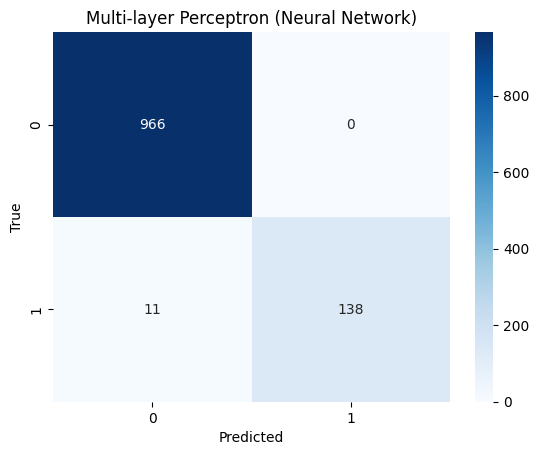

Classification Report for Multi-layer Perceptron (Neural Network):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       1.00      0.93      0.96       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.98      1115
weighted avg       0.99      0.99      0.99      1115



Accuracy for Multi-layer Perceptron (Neural Network): 99.01%

Precision for class 0: 0.99
Precision for class 1: 1.00


In [53]:
# 8.Multi-layer Perceptron (Neural Network)
clf_nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
evaluate_model(clf_nn, X_train, y_train, X_test, y_test, "Multi-layer Perceptron (Neural Network)")

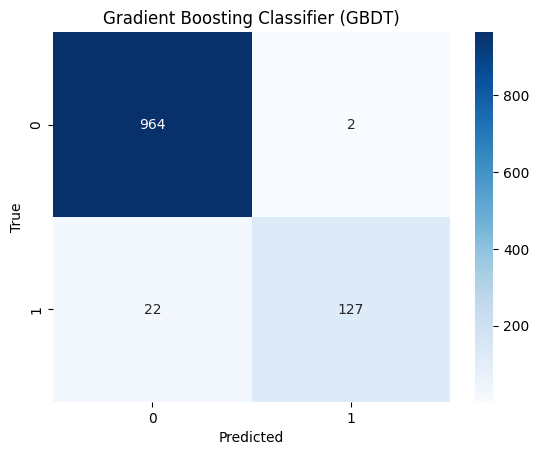

Classification Report for Gradient Boosting Classifier (GBDT):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.98      0.85      0.91       149

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



Accuracy for Gradient Boosting Classifier (GBDT): 97.85%

Precision for class 0: 0.98
Precision for class 1: 0.98


In [54]:
#9. Gradient Boosting Classifier (GBDT)
clf_gbdt = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
evaluate_model(clf_gbdt, X_train, y_train, X_test, y_test, "Gradient Boosting Classifier (GBDT)")

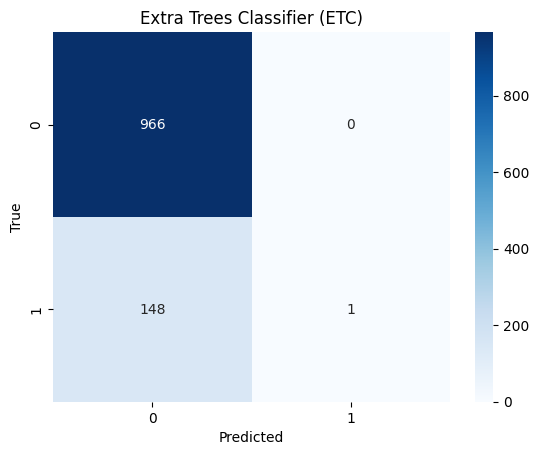

Classification Report for Extra Trees Classifier (ETC):
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       966
           1       1.00      0.01      0.01       149

    accuracy                           0.87      1115
   macro avg       0.93      0.50      0.47      1115
weighted avg       0.88      0.87      0.81      1115



Accuracy for Extra Trees Classifier (ETC): 86.73%

Precision for class 0: 0.87
Precision for class 1: 1.00


In [55]:
# 10. Extra Trees Classifier (ETC)
clf_etc = ExtraTreesClassifier(n_estimators=100, max_depth=5, random_state=0)
evaluate_model(clf_etc, X_train, y_train, X_test, y_test, "Extra Trees Classifier (ETC)")

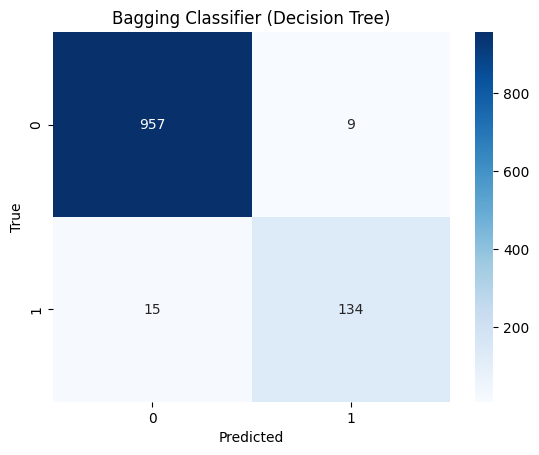

Classification Report for Bagging Classifier (Decision Tree):
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       966
           1       0.94      0.90      0.92       149

    accuracy                           0.98      1115
   macro avg       0.96      0.95      0.95      1115
weighted avg       0.98      0.98      0.98      1115



Accuracy for Bagging Classifier (Decision Tree): 97.85%

Precision for class 0: 0.98
Precision for class 1: 0.94


In [56]:
# 11. Bagging Classifier (BaggingClassifier) and Decision Tree as base estimator
clf_bg = BaggingClassifier(dt, n_estimators=100, random_state=0)
evaluate_model(clf_bg, X_train, y_train, X_test, y_test, "Bagging Classifier (Decision Tree)")

In [57]:
results_df = pd.DataFrame(results)

In [58]:
results_df

,Classifier,Accuracy,Precision
0,{Naive Bayes},98.57,"[0.99, 0.94]"
1,{Logistic Regression},98.57,"[0.98, 0.99]"
2,{SVM},98.12,"[0.98, 1.00]"
3,{Decision Tree},97.22,"[0.98, 0.91]"
4,{Random Forest},97.85,"[0.98, 1.00]"
5,{KNN},92.65,"[0.92, 1.00]"
6,{XGBoost},98.39,"[0.98, 0.99]"
7,{Multi-layer Perceptron (Neural Network)},99.01,"[0.99, 1.00]"
8,{Gradient Boosting Classifier (GBDT)},97.85,"[0.98, 0.98]"
9,{Extra Trees Classifier (ETC)},86.73,"[0.87, 1.00]"
